## Algemene imports

In [1]:
# Importeren van benodigde libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data inladen

In [2]:
# Functie om data in te laden
def load_data():
    # Lees de Excel bestanden in DataFrames
    df_omloopplanning = pd.read_excel('omloopplanning.xlsx', engine='openpyxl')
    df_dienstregeling = pd.read_excel('Connexxion data - 2024-2025.xlsx', engine='openpyxl')
    return df_omloopplanning, df_dienstregeling

# Inladen van data
df_omloopplanning, df_dienstregeling = load_data()

# Converteer tijd kolommen naar datetime objecten voor makkelijke bewerking
df_omloopplanning['starttijd'] = pd.to_datetime(df_omloopplanning['starttijd datum'])
df_omloopplanning['eindtijd'] = pd.to_datetime(df_omloopplanning['eindtijd datum'])

## Omloopplanning klaarmaken

In [3]:
# Verwijder de specifieke kolommen
df_omloopplanningv2 = df_omloopplanning.copy()
df_omloopplanningv2.drop(columns=['starttijd datum', 'eindtijd datum'], inplace=True)

# Zet de kolom 'starttijd' om naar datetime-formaat
df_omloopplanningv2['starttijd'] = pd.to_datetime(df_omloopplanningv2['starttijd'])
df_omloop = df_omloopplanningv2.copy()

# Sla de gefilterde gegevens op in een nieuwe DataFrame
# df_omloop = df_omloopplanning[df_omloopplanning['activiteit'] != 'idle']

# Voeg de kolommen samen en maak de nieuwe kolom 'code'
df_omloop['code_omloop'] = df_omloop['startlocatie'].astype(str) + '_' + \
                            df_omloop['eindlocatie'].astype(str) + '_' + \
                            df_omloop['buslijn'].astype(str)

# Controleer de eerste paar rijen van de DataFrame om zeker te zijn dat de nieuwe kolom is toegevoegd
display(df_omloop)

,Unnamed: 0,startlocatie,eindlocatie,starttijd,eindtijd,activiteit,buslijn,energieverbruik,omloop nummer,code_omloop
0,0,ehvgar,ehvbst,2024-08-29 05:03:00,2024-08-29 05:07:00,materiaal rit,NaN,1.9800,1,ehvgar_ehvbst_nan
1,1,ehvbst,ehvapt,2024-08-29 05:07:00,2024-08-29 05:31:00,dienst rit,401.0,10.8036,1,ehvbst_ehvapt_401.0
2,2,ehvapt,ehvapt,2024-08-29 05:31:00,2024-08-29 06:04:00,idle,NaN,0.0100,1,ehvapt_ehvapt_nan
3,3,ehvapt,ehvbst,2024-08-29 06:04:00,2024-08-29 06:29:00,dienst rit,401.0,10.8600,1,ehvapt_ehvbst_401.0
4,4,ehvbst,ehvbst,2024-08-29 06:29:00,2024-08-29 06:31:00,idle,NaN,0.0100,1,ehvbst_ehvbst_nan
...,...,...,...,...,...,...,...,...,...,...
715,715,ehvbst,ehvapt,2024-08-29 17:06:00,2024-08-29 17:30:00,dienst rit,400.0,12.8496,19,ehvbst_ehvapt_400.0
716,716,ehvapt,ehvgar,2024-08-29 17:30:00,2024-08-29 17:50:00,materiaal rit,NaN,10.8000,19,ehvapt_ehvgar_nan
717,717,ehvgar,ehvbst,2024-08-29 14:02:00,2024-08-29 14:06:00,materiaal rit,NaN,1.9800,20,ehvgar_ehvbst_nan
718,718,ehvbst,ehvapt,2024-08-29 14:06:00,2024-08-29 14:30:00,dienst rit,400.0,12.8496,20,ehvbst_ehvapt_400.0


## Conexxion afstandsmatrix

In [4]:
df_afstandsmatrix = pd.read_excel('Connexxion data - 2024-2025.xlsx', engine='openpyxl', sheet_name='Afstandsmatrix')

# Voeg de kolommen samen en maak de nieuwe kolom 'code'
df_afstandsmatrix['code_afstand'] = df_afstandsmatrix['startlocatie'].astype(str) + '_' + \
                            df_afstandsmatrix['eindlocatie'].astype(str) + '_' + \
                            df_afstandsmatrix['buslijn'].astype(str)

# Controleer de eerste paar rijen van de DataFrame om zeker te zijn dat de nieuwe kolom is toegevoegd
display(df_afstandsmatrix)

,startlocatie,eindlocatie,min reistijd in min,max reistijd in min,afstand in meters,buslijn,code_afstand
0,ehvapt,ehvbst,21,23,10250,400.0,ehvapt_ehvbst_400.0
1,ehvbst,ehvapt,21,23,10708,400.0,ehvbst_ehvapt_400.0
2,ehvapt,ehvbst,22,25,9050,401.0,ehvapt_ehvbst_401.0
3,ehvbst,ehvapt,22,24,9003,401.0,ehvbst_ehvapt_401.0
4,ehvapt,ehvbst,20,20,8600,NaN,ehvapt_ehvbst_nan
5,ehvbst,ehvapt,20,20,8600,NaN,ehvbst_ehvapt_nan
6,ehvbst,ehvgar,4,4,1650,NaN,ehvbst_ehvgar_nan
7,ehvgar,ehvbst,4,4,1650,NaN,ehvgar_ehvbst_nan
8,ehvapt,ehvgar,20,20,9000,NaN,ehvapt_ehvgar_nan
9,ehvgar,ehvapt,20,20,9000,NaN,ehvgar_ehvapt_nan


## Afstand linken

In [5]:
# Merge df_omloop with the relevant columns from df_afstandsmatrix
df_omloop_merged = pd.merge(
    df_omloop,
    df_afstandsmatrix[['code_afstand', 'afstand in meters']],
    left_on='code_omloop',
    right_on='code_afstand',
    how='left'
)

# Remove the 'code_afstand' column if it's not needed
df_omloop_merged.drop(columns=['code_afstand'], inplace=True)

# Create a new column 'afstand in km' by converting 'afstand in meters' to kilometers
df_omloop_merged['afstand in km'] = df_omloop_merged['afstand in meters'] / 1000

# Display the resulting DataFrame
display(df_omloop_merged)

,Unnamed: 0,startlocatie,eindlocatie,starttijd,eindtijd,activiteit,buslijn,energieverbruik,omloop nummer,code_omloop,afstand in meters,afstand in km
0,0,ehvgar,ehvbst,2024-08-29 05:03:00,2024-08-29 05:07:00,materiaal rit,NaN,1.9800,1,ehvgar_ehvbst_nan,1650.0,1.650
1,1,ehvbst,ehvapt,2024-08-29 05:07:00,2024-08-29 05:31:00,dienst rit,401.0,10.8036,1,ehvbst_ehvapt_401.0,9003.0,9.003
2,2,ehvapt,ehvapt,2024-08-29 05:31:00,2024-08-29 06:04:00,idle,NaN,0.0100,1,ehvapt_ehvapt_nan,NaN,NaN
3,3,ehvapt,ehvbst,2024-08-29 06:04:00,2024-08-29 06:29:00,dienst rit,401.0,10.8600,1,ehvapt_ehvbst_401.0,9050.0,9.050
4,4,ehvbst,ehvbst,2024-08-29 06:29:00,2024-08-29 06:31:00,idle,NaN,0.0100,1,ehvbst_ehvbst_nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,ehvbst,ehvapt,2024-08-29 17:06:00,2024-08-29 17:30:00,dienst rit,400.0,12.8496,19,ehvbst_ehvapt_400.0,10708.0,10.708
716,716,ehvapt,ehvgar,2024-08-29 17:30:00,2024-08-29 17:50:00,materiaal rit,NaN,10.8000,19,ehvapt_ehvgar_nan,9000.0,9.000
717,717,ehvgar,ehvbst,2024-08-29 14:02:00,2024-08-29 14:06:00,materiaal rit,NaN,1.9800,20,ehvgar_ehvbst_nan,1650.0,1.650
718,718,ehvbst,ehvapt,2024-08-29 14:06:00,2024-08-29 14:30:00,dienst rit,400.0,12.8496,20,ehvbst_ehvapt_400.0,10708.0,10.708


## Variabelen

In [6]:
energie_verbruik_per_km = 1.2 #kWh per gereden kilometer
oplaadkracht_per_uur = 450 # kWh per uur tot 90%
oplaadkracht_per_uur_laatste = 60 # wordt niet gebruikt
max_batt_capa = 300 # kWh
SOC_start = 0.9 # factor
SOC_min = 0.1 # factor
batterijslijtage = 0.9 # Afhankelijk van de leeftijd van de bus is dat zo’n 85%-95% van de maximale capaciteit 
SOH =  max_batt_capa * batterijslijtage # De SOH is de maximale capaciteit van een specifieke bus


SOC_ochtend = SOH * SOC_start # De SOC geeft aan hoeveel procent de bus nog geladen is. 100% is daarbij gelijk aan de SOH van de bus.
SOC_minimum = SOH * SOC_min # De veiligheidsmarge van 10% heeft ook betrekking op de SOH

# DataFrame maken
data = {
    'Parameter': ['Max Batterij Capaciteit', 'SOC Start', 'SOC Minimum', 'Batterij Slijtage', 'SOH', 'SOC Ochtend', 'SOC Minimum','Batterijverbuik','Oplaadsnelheid'],
    'Waarde': [max_batt_capa, SOC_start, SOC_min, batterijslijtage, SOH, SOC_ochtend, SOC_minimum, energie_verbruik_per_km,oplaadkracht_per_uur],
    'Eenheid': ['kWh', 'Factor', 'Factor', 'Factor', 'kW (MBC * BS)', 'kW (SOH * SOC S)', 'kW (SOH * SOC M)','kWh/km','kWh/uur']
}

df = pd.DataFrame(data)

# Resultaat weergeven
display(df)

,Parameter,Waarde,Eenheid
0,Max Batterij Capaciteit,300.0,kWh
1,SOC Start,0.9,Factor
2,SOC Minimum,0.1,Factor
3,Batterij Slijtage,0.9,Factor
4,SOH,270.0,kW (MBC * BS)
5,SOC Ochtend,243.0,kW (SOH * SOC S)
6,SOC Minimum,27.0,kW (SOH * SOC M)
7,Batterijverbuik,1.2,kWh/km
8,Oplaadsnelheid,450.0,kWh/uur


## Energieverbruik dict maken

In [7]:
import pandas as pd

# Verkrijg alle unieke waarden van 'code_afstand'
unieke_omloop = df_omloop_merged['omloop nummer'].unique()

# Maak een lege dictionary om de DataFrames op te slaan
df_dict_omloop = {}
totaal = 0
# Loop door elke unieke code en filter df_omloop
for omloop in unieke_omloop:
    # Filter df_omloop
    gefilterde_df = df_omloop_merged[df_omloop_merged['omloop nummer'] == omloop]
    
    # Voeg het gefilterde DataFrame toe aan de dictionary
    df_dict_omloop[omloop] = gefilterde_df
    
    # Optioneel: Print de eerste paar rijen van elk gefilterd DataFrame
    # print(f"Code: {omloop}")
    # display(gefilterde_df.head())
    # print(len(gefilterde_df))
    totaal += len(gefilterde_df)
    
print(totaal)
# df_dict bevat nu een DataFrame voor elke unieke 'code_afstand'


720


## Voorbeeld dictionary

In [8]:
df_dict_omloop[20][['starttijd', 'eindtijd', 'activiteit', 'omloop nummer', 'code_omloop','afstand in km']]

,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km
717,2024-08-29 14:02:00,2024-08-29 14:06:00,materiaal rit,20,ehvgar_ehvbst_nan,1.650
718,2024-08-29 14:06:00,2024-08-29 14:30:00,dienst rit,20,ehvbst_ehvapt_400.0,10.708
719,2024-08-29 14:30:00,2024-08-29 14:50:00,materiaal rit,20,ehvapt_ehvgar_nan,9.000


## SOC einde van de rit bepalen

In [9]:
import pandas as pd

resultaten = {}

for key, df in df_dict_omloop.items():
    omloop_energie = df[['starttijd', 'eindtijd', 'activiteit', 'omloop nummer', 'code_omloop', 'afstand in km']].copy()
    omloop_energie['afstand in km'] = omloop_energie['afstand in km'].fillna(0)

    # Reset the index to use integer indexing
    omloop_energie.reset_index(drop=True, inplace=True)
    
    omloop_energie.sort_values(by=['starttijd', 'eindtijd'], inplace=True)

    # Initialize 'SOC_beginrit' for the first row
    omloop_energie.at[0, 'SOC_beginrit'] = SOC_ochtend
    
    for i in range(len(omloop_energie)):
        SOC_start = omloop_energie.at[i, 'SOC_beginrit']
        
        if omloop_energie.at[i, 'activiteit'] == 'opladen':
            starttijd = pd.to_datetime(omloop_energie.at[i, 'starttijd'])
            eindtijd = pd.to_datetime(omloop_energie.at[i, 'eindtijd'])
            duur_in_uren = (eindtijd - starttijd).total_seconds() / 3600
            
            opgeladen_energie = oplaadkracht_per_uur * duur_in_uren
            SOC_eind = SOC_start + opgeladen_energie
        else:
            afstand = omloop_energie.at[i, 'afstand in km']
            verbruik = energie_verbruik_per_km * afstand if pd.notna(afstand) else 0
            SOC_eind = SOC_start - verbruik
        
        # Save the calculated SOC, even if it is negative
        omloop_energie.at[i, 'SOC_eindrit'] = SOC_eind
        
        if i + 1 < len(omloop_energie):
            omloop_energie.at[i + 1, 'SOC_beginrit'] = SOC_eind
    
    resultaten[key] = omloop_energie

# Display results to check for correct assignment of SOC values
for key, result in resultaten.items():
    print(f"Resultaat voor omloopnummer {key}:")
    display(result)

Resultaat voor omloopnummer 1:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 05:03:00,2024-08-29 05:07:00,materiaal rit,1,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 05:07:00,2024-08-29 05:31:00,dienst rit,1,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 05:31:00,2024-08-29 06:04:00,idle,1,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 06:04:00,2024-08-29 06:29:00,dienst rit,1,ehvapt_ehvbst_401.0,9.050,230.2164,219.3564
4,2024-08-29 06:29:00,2024-08-29 06:31:00,idle,1,ehvbst_ehvbst_nan,0.000,219.3564,219.3564
...,...,...,...,...,...,...,...,...
58,2024-08-29 23:30:00,2024-08-29 23:37:00,idle,1,ehvbst_ehvbst_nan,0.000,171.0228,171.0228
59,2024-08-29 23:37:00,2024-08-30 00:01:00,dienst rit,1,ehvbst_ehvapt_401.0,9.003,171.0228,160.2192
61,2024-08-30 00:01:00,2024-08-30 00:01:00,idle,1,ehvapt_ehvapt_nan,0.000,149.3592,149.3592
60,2024-08-30 00:01:00,2024-08-30 00:26:00,dienst rit,1,ehvapt_ehvbst_401.0,9.050,160.2192,149.3592


Resultaat voor omloopnummer 2:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 05:33:00,2024-08-29 05:37:00,materiaal rit,2,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 05:37:00,2024-08-29 06:01:00,dienst rit,2,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 06:01:00,2024-08-29 06:34:00,idle,2,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 06:34:00,2024-08-29 06:59:00,dienst rit,2,ehvapt_ehvbst_401.0,9.050,230.2164,219.3564
5,2024-08-29 06:59:00,2024-08-29 06:59:00,idle,2,ehvbst_ehvbst_nan,0.000,208.5528,208.5528
...,...,...,...,...,...,...,...,...
58,2024-08-29 23:31:00,2024-08-29 23:35:00,idle,2,ehvapt_ehvapt_nan,0.000,181.3992,181.3992
59,2024-08-29 23:35:00,2024-08-30 00:00:00,dienst rit,2,ehvapt_ehvbst_401.0,9.050,181.3992,170.5392
60,2024-08-30 00:00:00,2024-08-30 00:20:00,materiaal rit,2,ehvbst_ehvapt_nan,8.600,170.5392,160.2192
61,2024-08-30 00:31:00,2024-08-30 00:56:00,dienst rit,2,ehvapt_ehvbst_401.0,9.050,160.2192,149.3592


Resultaat voor omloopnummer 3:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 06:03:00,2024-08-29 06:07:00,materiaal rit,3,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 06:07:00,2024-08-29 06:31:00,dienst rit,3,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 06:31:00,2024-08-29 07:11:00,idle,3,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 07:11:00,2024-08-29 07:36:00,dienst rit,3,ehvapt_ehvbst_401.0,9.050,230.2164,219.3564
4,2024-08-29 07:36:00,2024-08-29 07:56:00,materiaal rit,3,ehvbst_ehvapt_nan,8.600,219.3564,209.0364
5,2024-08-29 07:56:00,2024-08-29 08:21:00,dienst rit,3,ehvapt_ehvbst_401.0,9.050,209.0364,198.1764
6,2024-08-29 08:21:00,2024-08-29 08:21:00,idle,3,ehvbst_ehvbst_nan,0.000,198.1764,198.1764
7,2024-08-29 08:21:00,2024-08-29 08:45:00,dienst rit,3,ehvbst_ehvapt_400.0,10.708,198.1764,185.3268
8,2024-08-29 08:45:00,2024-08-29 08:46:00,idle,3,ehvapt_ehvapt_nan,0.000,185.3268,185.3268
9,2024-08-29 08:46:00,2024-08-29 09:11:00,dienst rit,3,ehvapt_ehvbst_401.0,9.050,185.3268,174.4668


Resultaat voor omloopnummer 4:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 06:42:00,2024-08-29 06:46:00,materiaal rit,4,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 06:46:00,2024-08-29 07:10:00,dienst rit,4,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 07:10:00,2024-08-29 07:36:00,idle,4,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 07:36:00,2024-08-29 08:01:00,dienst rit,4,ehvapt_ehvbst_401.0,9.050,230.2164,219.3564
4,2024-08-29 08:01:00,2024-08-29 08:21:00,materiaal rit,4,ehvbst_ehvapt_nan,8.600,219.3564,209.0364
5,2024-08-29 08:26:00,2024-08-29 08:51:00,dienst rit,4,ehvapt_ehvbst_401.0,9.050,209.0364,198.1764
6,2024-08-29 08:51:00,2024-08-29 08:51:00,idle,4,ehvbst_ehvbst_nan,0.000,198.1764,198.1764
7,2024-08-29 08:51:00,2024-08-29 09:15:00,dienst rit,4,ehvbst_ehvapt_400.0,10.708,198.1764,185.3268
8,2024-08-29 09:15:00,2024-08-29 09:16:00,idle,4,ehvapt_ehvapt_nan,0.000,185.3268,185.3268
9,2024-08-29 09:16:00,2024-08-29 09:41:00,dienst rit,4,ehvapt_ehvbst_401.0,9.050,185.3268,174.4668


Resultaat voor omloopnummer 5:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:05:00,2024-08-29 07:09:00,materiaal rit,5,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:09:00,2024-08-29 07:33:00,dienst rit,5,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 07:33:00,2024-08-29 08:06:00,idle,5,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 08:06:00,2024-08-29 08:31:00,dienst rit,5,ehvapt_ehvbst_401.0,9.050,230.2164,219.3564
4,2024-08-29 08:31:00,2024-08-29 08:51:00,materiaal rit,5,ehvbst_ehvapt_nan,8.600,219.3564,209.0364
5,2024-08-29 08:56:00,2024-08-29 09:21:00,dienst rit,5,ehvapt_ehvbst_401.0,9.050,209.0364,198.1764
6,2024-08-29 09:21:00,2024-08-29 09:21:00,idle,5,ehvbst_ehvbst_nan,0.000,198.1764,198.1764
7,2024-08-29 09:21:00,2024-08-29 09:45:00,dienst rit,5,ehvbst_ehvapt_400.0,10.708,198.1764,185.3268
8,2024-08-29 09:45:00,2024-08-29 09:46:00,idle,5,ehvapt_ehvapt_nan,0.000,185.3268,185.3268
9,2024-08-29 09:46:00,2024-08-29 10:11:00,dienst rit,5,ehvapt_ehvbst_401.0,9.050,185.3268,174.4668


Resultaat voor omloopnummer 6:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 06:48:00,2024-08-29 06:52:00,materiaal rit,6,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 06:52:00,2024-08-29 07:16:00,dienst rit,6,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 07:16:00,2024-08-29 07:19:00,idle,6,ehvapt_ehvapt_nan,0.000,228.1704,228.1704
3,2024-08-29 07:19:00,2024-08-29 07:43:00,dienst rit,6,ehvapt_ehvbst_400.0,10.250,228.1704,215.8704
4,2024-08-29 07:43:00,2024-08-29 08:03:00,materiaal rit,6,ehvbst_ehvapt_nan,8.600,215.8704,205.5504
5,2024-08-29 08:04:00,2024-08-29 08:28:00,dienst rit,6,ehvapt_ehvbst_400.0,10.250,205.5504,193.2504
6,2024-08-29 08:28:00,2024-08-29 08:48:00,materiaal rit,6,ehvbst_ehvapt_nan,8.600,193.2504,182.9304
7,2024-08-29 08:49:00,2024-08-29 09:13:00,dienst rit,6,ehvapt_ehvbst_400.0,10.250,182.9304,170.6304
8,2024-08-29 09:13:00,2024-08-29 09:33:00,materiaal rit,6,ehvbst_ehvapt_nan,8.600,170.6304,160.3104
9,2024-08-29 09:34:00,2024-08-29 09:58:00,dienst rit,6,ehvapt_ehvbst_400.0,10.250,160.3104,148.0104


Resultaat voor omloopnummer 7:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:02:00,2024-08-29 07:06:00,materiaal rit,7,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:06:00,2024-08-29 07:30:00,dienst rit,7,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 07:30:00,2024-08-29 07:34:00,idle,7,ehvapt_ehvapt_nan,0.000,228.1704,228.1704
3,2024-08-29 07:34:00,2024-08-29 07:58:00,dienst rit,7,ehvapt_ehvbst_400.0,10.250,228.1704,215.8704
4,2024-08-29 07:58:00,2024-08-29 08:18:00,materiaal rit,7,ehvbst_ehvapt_nan,8.600,215.8704,205.5504
5,2024-08-29 08:19:00,2024-08-29 08:43:00,dienst rit,7,ehvapt_ehvbst_400.0,10.250,205.5504,193.2504
6,2024-08-29 08:43:00,2024-08-29 09:03:00,materiaal rit,7,ehvbst_ehvapt_nan,8.600,193.2504,182.9304
7,2024-08-29 09:04:00,2024-08-29 09:28:00,dienst rit,7,ehvapt_ehvbst_400.0,10.250,182.9304,170.6304
8,2024-08-29 09:28:00,2024-08-29 09:48:00,materiaal rit,7,ehvbst_ehvapt_nan,8.600,170.6304,160.3104
9,2024-08-29 09:49:00,2024-08-29 10:13:00,dienst rit,7,ehvapt_ehvbst_400.0,10.250,160.3104,148.0104


Resultaat voor omloopnummer 8:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:15:00,2024-08-29 07:19:00,materiaal rit,8,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:19:00,2024-08-29 07:43:00,dienst rit,8,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 07:43:00,2024-08-29 07:49:00,idle,8,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 07:49:00,2024-08-29 08:13:00,dienst rit,8,ehvapt_ehvbst_400.0,10.250,230.2164,217.9164
4,2024-08-29 08:13:00,2024-08-29 08:33:00,materiaal rit,8,ehvbst_ehvapt_nan,8.600,217.9164,207.5964
5,2024-08-29 08:34:00,2024-08-29 08:58:00,dienst rit,8,ehvapt_ehvbst_400.0,10.250,207.5964,195.2964
6,2024-08-29 08:58:00,2024-08-29 09:18:00,materiaal rit,8,ehvbst_ehvapt_nan,8.600,195.2964,184.9764
7,2024-08-29 09:19:00,2024-08-29 09:43:00,dienst rit,8,ehvapt_ehvbst_400.0,10.250,184.9764,172.6764
8,2024-08-29 09:43:00,2024-08-29 10:03:00,materiaal rit,8,ehvbst_ehvapt_nan,8.600,172.6764,162.3564
9,2024-08-29 10:04:00,2024-08-29 10:28:00,dienst rit,8,ehvapt_ehvbst_400.0,10.250,162.3564,150.0564


Resultaat voor omloopnummer 9:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:25:00,2024-08-29 07:29:00,materiaal rit,9,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:29:00,2024-08-29 07:53:00,dienst rit,9,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 07:53:00,2024-08-29 08:27:00,idle,9,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 08:27:00,2024-08-29 08:51:00,dienst rit,9,ehvapt_ehvbst_400.0,10.250,230.2164,217.9164
4,2024-08-29 08:51:00,2024-08-29 08:59:00,idle,9,ehvbst_ehvbst_nan,0.000,217.9164,217.9164
5,2024-08-29 08:59:00,2024-08-29 09:23:00,dienst rit,9,ehvbst_ehvapt_401.0,9.003,217.9164,207.1128
6,2024-08-29 09:23:00,2024-08-29 09:27:00,idle,9,ehvapt_ehvapt_nan,0.000,207.1128,207.1128
7,2024-08-29 09:27:00,2024-08-29 09:51:00,dienst rit,9,ehvapt_ehvbst_400.0,10.250,207.1128,194.8128
8,2024-08-29 09:51:00,2024-08-29 09:59:00,idle,9,ehvbst_ehvbst_nan,0.000,194.8128,194.8128
9,2024-08-29 09:59:00,2024-08-29 10:23:00,dienst rit,9,ehvbst_ehvapt_401.0,9.003,194.8128,184.0092


Resultaat voor omloopnummer 10:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:35:00,2024-08-29 07:39:00,materiaal rit,10,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:39:00,2024-08-29 08:03:00,dienst rit,10,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 08:03:00,2024-08-29 08:57:00,idle,10,ehvapt_ehvapt_nan,0.000,230.2164,230.2164
3,2024-08-29 08:57:00,2024-08-29 09:21:00,dienst rit,10,ehvapt_ehvbst_400.0,10.250,230.2164,217.9164
4,2024-08-29 09:21:00,2024-08-29 09:29:00,idle,10,ehvbst_ehvbst_nan,0.000,217.9164,217.9164
5,2024-08-29 09:29:00,2024-08-29 09:53:00,dienst rit,10,ehvbst_ehvapt_401.0,9.003,217.9164,207.1128
6,2024-08-29 09:53:00,2024-08-29 09:57:00,idle,10,ehvapt_ehvapt_nan,0.000,207.1128,207.1128
7,2024-08-29 09:57:00,2024-08-29 10:21:00,dienst rit,10,ehvapt_ehvbst_400.0,10.250,207.1128,194.8128
8,2024-08-29 10:21:00,2024-08-29 10:29:00,idle,10,ehvbst_ehvbst_nan,0.000,194.8128,194.8128
9,2024-08-29 10:29:00,2024-08-29 10:53:00,dienst rit,10,ehvbst_ehvapt_401.0,9.003,194.8128,184.0092


Resultaat voor omloopnummer 11:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:45:00,2024-08-29 07:49:00,materiaal rit,11,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:49:00,2024-08-29 08:13:00,dienst rit,11,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 08:13:00,2024-08-29 08:33:00,materiaal rit,11,ehvapt_ehvbst_nan,8.600,230.2164,219.8964
3,2024-08-29 08:39:00,2024-08-29 09:03:00,dienst rit,11,ehvbst_ehvapt_401.0,9.003,219.8964,209.0928
4,2024-08-29 09:03:00,2024-08-29 09:23:00,materiaal rit,11,ehvapt_ehvbst_nan,8.600,209.0928,198.7728
5,2024-08-29 09:39:00,2024-08-29 10:03:00,dienst rit,11,ehvbst_ehvapt_401.0,9.003,198.7728,187.9692
6,2024-08-29 10:03:00,2024-08-29 10:23:00,materiaal rit,11,ehvapt_ehvbst_nan,8.600,187.9692,177.6492
7,2024-08-29 10:39:00,2024-08-29 11:03:00,dienst rit,11,ehvbst_ehvapt_401.0,9.003,177.6492,166.8456
8,2024-08-29 11:03:00,2024-08-29 11:23:00,materiaal rit,11,ehvapt_ehvbst_nan,8.600,166.8456,156.5256
9,2024-08-29 11:39:00,2024-08-29 12:03:00,dienst rit,11,ehvbst_ehvapt_401.0,9.003,156.5256,145.7220


Resultaat voor omloopnummer 12:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:55:00,2024-08-29 07:59:00,materiaal rit,12,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:59:00,2024-08-29 08:23:00,dienst rit,12,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 08:23:00,2024-08-29 08:43:00,materiaal rit,12,ehvapt_ehvbst_nan,8.600,230.2164,219.8964
3,2024-08-29 08:49:00,2024-08-29 09:13:00,dienst rit,12,ehvbst_ehvapt_401.0,9.003,219.8964,209.0928
4,2024-08-29 09:13:00,2024-08-29 09:33:00,materiaal rit,12,ehvapt_ehvbst_nan,8.600,209.0928,198.7728
5,2024-08-29 09:49:00,2024-08-29 10:13:00,dienst rit,12,ehvbst_ehvapt_401.0,9.003,198.7728,187.9692
6,2024-08-29 10:13:00,2024-08-29 10:33:00,materiaal rit,12,ehvapt_ehvbst_nan,8.600,187.9692,177.6492
7,2024-08-29 10:49:00,2024-08-29 11:13:00,dienst rit,12,ehvbst_ehvapt_401.0,9.003,177.6492,166.8456
8,2024-08-29 11:13:00,2024-08-29 11:33:00,materiaal rit,12,ehvapt_ehvbst_nan,8.600,166.8456,156.5256
9,2024-08-29 11:49:00,2024-08-29 12:13:00,dienst rit,12,ehvbst_ehvapt_401.0,9.003,156.5256,145.7220


Resultaat voor omloopnummer 13:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 08:05:00,2024-08-29 08:09:00,materiaal rit,13,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 08:09:00,2024-08-29 08:33:00,dienst rit,13,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 08:33:00,2024-08-29 08:53:00,materiaal rit,13,ehvapt_ehvbst_nan,8.600,230.2164,219.8964
3,2024-08-29 09:09:00,2024-08-29 09:33:00,dienst rit,13,ehvbst_ehvapt_401.0,9.003,219.8964,209.0928
4,2024-08-29 09:33:00,2024-08-29 09:53:00,materiaal rit,13,ehvapt_ehvbst_nan,8.600,209.0928,198.7728
5,2024-08-29 10:09:00,2024-08-29 10:33:00,dienst rit,13,ehvbst_ehvapt_401.0,9.003,198.7728,187.9692
6,2024-08-29 10:33:00,2024-08-29 10:53:00,materiaal rit,13,ehvapt_ehvbst_nan,8.600,187.9692,177.6492
7,2024-08-29 11:09:00,2024-08-29 11:33:00,dienst rit,13,ehvbst_ehvapt_401.0,9.003,177.6492,166.8456
8,2024-08-29 11:33:00,2024-08-29 11:53:00,materiaal rit,13,ehvapt_ehvbst_nan,8.600,166.8456,156.5256
9,2024-08-29 12:09:00,2024-08-29 12:33:00,dienst rit,13,ehvbst_ehvapt_401.0,9.003,156.5256,145.7220


Resultaat voor omloopnummer 14:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 08:15:00,2024-08-29 08:19:00,materiaal rit,14,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 08:19:00,2024-08-29 08:43:00,dienst rit,14,ehvbst_ehvapt_401.0,9.003,241.0200,230.2164
2,2024-08-29 08:43:00,2024-08-29 09:03:00,materiaal rit,14,ehvapt_ehvbst_nan,8.600,230.2164,219.8964
3,2024-08-29 09:19:00,2024-08-29 09:43:00,dienst rit,14,ehvbst_ehvapt_401.0,9.003,219.8964,209.0928
4,2024-08-29 09:43:00,2024-08-29 10:03:00,materiaal rit,14,ehvapt_ehvbst_nan,8.600,209.0928,198.7728
5,2024-08-29 10:19:00,2024-08-29 10:43:00,dienst rit,14,ehvbst_ehvapt_401.0,9.003,198.7728,187.9692
6,2024-08-29 10:43:00,2024-08-29 11:03:00,materiaal rit,14,ehvapt_ehvbst_nan,8.600,187.9692,177.6492
7,2024-08-29 11:19:00,2024-08-29 11:43:00,dienst rit,14,ehvbst_ehvapt_401.0,9.003,177.6492,166.8456
8,2024-08-29 11:43:00,2024-08-29 12:03:00,materiaal rit,14,ehvapt_ehvbst_nan,8.600,166.8456,156.5256
9,2024-08-29 12:19:00,2024-08-29 12:43:00,dienst rit,14,ehvbst_ehvapt_401.0,9.003,156.5256,145.7220


Resultaat voor omloopnummer 15:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:32:00,2024-08-29 07:36:00,materiaal rit,15,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:36:00,2024-08-29 08:00:00,dienst rit,15,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 08:00:00,2024-08-29 08:20:00,materiaal rit,15,ehvapt_ehvbst_nan,8.600,228.1704,217.8504
3,2024-08-29 08:29:00,2024-08-29 08:53:00,dienst rit,15,ehvbst_ehvapt_401.0,9.003,217.8504,207.0468
4,2024-08-29 08:53:00,2024-08-29 09:13:00,materiaal rit,15,ehvapt_ehvbst_nan,8.600,207.0468,196.7268
5,2024-08-29 09:24:00,2024-08-29 09:48:00,dienst rit,15,ehvbst_ehvapt_400.0,10.708,196.7268,183.8772
6,2024-08-29 09:48:00,2024-08-29 10:08:00,materiaal rit,15,ehvapt_ehvbst_nan,8.600,183.8772,173.5572
7,2024-08-29 10:21:00,2024-08-29 10:45:00,dienst rit,15,ehvbst_ehvapt_400.0,10.708,173.5572,160.7076
8,2024-08-29 10:45:00,2024-08-29 11:05:00,materiaal rit,15,ehvapt_ehvbst_nan,8.600,160.7076,150.3876
9,2024-08-29 11:06:00,2024-08-29 11:30:00,dienst rit,15,ehvbst_ehvapt_400.0,10.708,150.3876,137.5380


Resultaat voor omloopnummer 16:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 07:50:00,2024-08-29 07:54:00,materiaal rit,16,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 07:54:00,2024-08-29 08:18:00,dienst rit,16,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 08:18:00,2024-08-29 08:38:00,materiaal rit,16,ehvapt_ehvbst_nan,8.600,228.1704,217.8504
3,2024-08-29 08:54:00,2024-08-29 09:18:00,dienst rit,16,ehvbst_ehvapt_400.0,10.708,217.8504,205.0008
4,2024-08-29 09:18:00,2024-08-29 09:38:00,materiaal rit,16,ehvapt_ehvbst_nan,8.600,205.0008,194.6808
5,2024-08-29 09:51:00,2024-08-29 10:15:00,dienst rit,16,ehvbst_ehvapt_400.0,10.708,194.6808,181.8312
6,2024-08-29 10:15:00,2024-08-29 10:35:00,materiaal rit,16,ehvapt_ehvbst_nan,8.600,181.8312,171.5112
7,2024-08-29 10:36:00,2024-08-29 11:00:00,dienst rit,16,ehvbst_ehvapt_400.0,10.708,171.5112,158.6616
8,2024-08-29 11:00:00,2024-08-29 11:20:00,materiaal rit,16,ehvapt_ehvbst_nan,8.600,158.6616,148.3416
9,2024-08-29 11:24:00,2024-08-29 11:48:00,dienst rit,16,ehvbst_ehvapt_400.0,10.708,148.3416,135.4920


Resultaat voor omloopnummer 17:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 08:02:00,2024-08-29 08:06:00,materiaal rit,17,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 08:06:00,2024-08-29 08:30:00,dienst rit,17,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 08:30:00,2024-08-29 08:50:00,materiaal rit,17,ehvapt_ehvbst_nan,8.600,228.1704,217.8504
3,2024-08-29 09:06:00,2024-08-29 09:30:00,dienst rit,17,ehvbst_ehvapt_400.0,10.708,217.8504,205.0008
4,2024-08-29 09:30:00,2024-08-29 09:50:00,materiaal rit,17,ehvapt_ehvbst_nan,8.600,205.0008,194.6808
5,2024-08-29 09:54:00,2024-08-29 10:18:00,dienst rit,17,ehvbst_ehvapt_400.0,10.708,194.6808,181.8312
6,2024-08-29 10:18:00,2024-08-29 10:38:00,materiaal rit,17,ehvapt_ehvbst_nan,8.600,181.8312,171.5112
7,2024-08-29 10:54:00,2024-08-29 11:18:00,dienst rit,17,ehvbst_ehvapt_400.0,10.708,171.5112,158.6616
8,2024-08-29 11:18:00,2024-08-29 11:38:00,materiaal rit,17,ehvapt_ehvbst_nan,8.600,158.6616,148.3416
9,2024-08-29 11:54:00,2024-08-29 12:18:00,dienst rit,17,ehvbst_ehvapt_400.0,10.708,148.3416,135.4920


Resultaat voor omloopnummer 18:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 08:20:00,2024-08-29 08:24:00,materiaal rit,18,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 08:24:00,2024-08-29 08:48:00,dienst rit,18,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 08:48:00,2024-08-29 09:08:00,materiaal rit,18,ehvapt_ehvbst_nan,8.600,228.1704,217.8504
3,2024-08-29 09:36:00,2024-08-29 10:00:00,dienst rit,18,ehvbst_ehvapt_400.0,10.708,217.8504,205.0008
4,2024-08-29 10:00:00,2024-08-29 10:20:00,materiaal rit,18,ehvapt_ehvbst_nan,8.600,205.0008,194.6808
5,2024-08-29 10:24:00,2024-08-29 10:48:00,dienst rit,18,ehvbst_ehvapt_400.0,10.708,194.6808,181.8312
6,2024-08-29 10:48:00,2024-08-29 11:08:00,materiaal rit,18,ehvapt_ehvbst_nan,8.600,181.8312,171.5112
7,2024-08-29 11:36:00,2024-08-29 12:00:00,dienst rit,18,ehvbst_ehvapt_400.0,10.708,171.5112,158.6616
8,2024-08-29 12:00:00,2024-08-29 12:20:00,materiaal rit,18,ehvapt_ehvbst_nan,8.600,158.6616,148.3416
9,2024-08-29 12:24:00,2024-08-29 12:48:00,dienst rit,18,ehvbst_ehvapt_400.0,10.708,148.3416,135.4920


Resultaat voor omloopnummer 19:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 08:32:00,2024-08-29 08:36:00,materiaal rit,19,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 08:36:00,2024-08-29 09:00:00,dienst rit,19,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 09:00:00,2024-08-29 09:20:00,materiaal rit,19,ehvapt_ehvbst_nan,8.600,228.1704,217.8504
3,2024-08-29 10:06:00,2024-08-29 10:30:00,dienst rit,19,ehvbst_ehvapt_400.0,10.708,217.8504,205.0008
4,2024-08-29 10:30:00,2024-08-29 10:50:00,materiaal rit,19,ehvapt_ehvbst_nan,8.600,205.0008,194.6808
5,2024-08-29 12:06:00,2024-08-29 12:30:00,dienst rit,19,ehvbst_ehvapt_400.0,10.708,194.6808,181.8312
6,2024-08-29 12:30:00,2024-08-29 12:50:00,materiaal rit,19,ehvapt_ehvbst_nan,8.600,181.8312,171.5112
7,2024-08-29 12:54:00,2024-08-29 13:18:00,dienst rit,19,ehvbst_ehvapt_400.0,10.708,171.5112,158.6616
8,2024-08-29 13:18:00,2024-08-29 13:38:00,materiaal rit,19,ehvapt_ehvbst_nan,8.600,158.6616,148.3416
9,2024-08-29 13:54:00,2024-08-29 14:18:00,dienst rit,19,ehvbst_ehvapt_400.0,10.708,148.3416,135.4920


Resultaat voor omloopnummer 20:


,starttijd,eindtijd,activiteit,omloop nummer,code_omloop,afstand in km,SOC_beginrit,SOC_eindrit
0,2024-08-29 14:02:00,2024-08-29 14:06:00,materiaal rit,20,ehvgar_ehvbst_nan,1.650,243.0000,241.0200
1,2024-08-29 14:06:00,2024-08-29 14:30:00,dienst rit,20,ehvbst_ehvapt_400.0,10.708,241.0200,228.1704
2,2024-08-29 14:30:00,2024-08-29 14:50:00,materiaal rit,20,ehvapt_ehvgar_nan,9.000,228.1704,217.3704


## Plotten

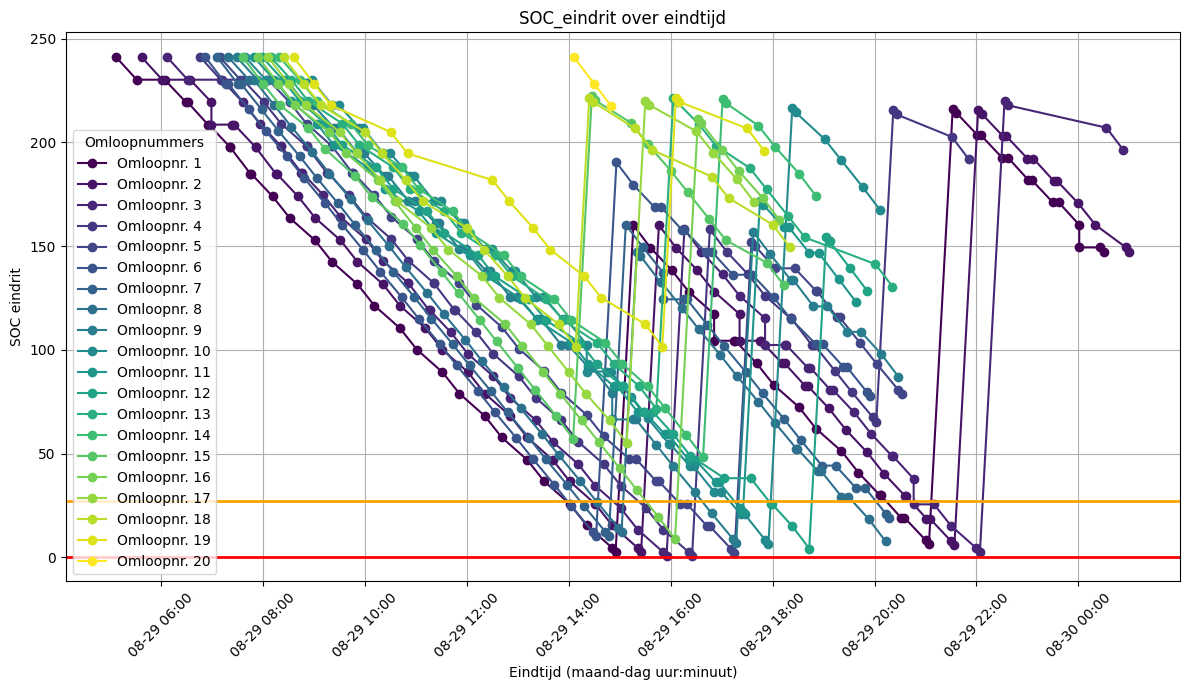

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Initialiseer een plot
plt.figure(figsize=(12, 7))

# Zet de formatter voor tijdweergave op de x-as
time_formatter = mdates.DateFormatter('%m-%d %H:%M')

# Maak een colormap aan voor visuele differentiatie
colors = plt.cm.viridis(np.linspace(0, 1, len(resultaten)))

# Itereer over de resultaten en plot ze
for (key, result), color in zip(resultaten.items(), colors):
    # Zorg ervoor dat 'eindtijd' een datetime object is
    result['eindtijd'] = pd.to_datetime(result['eindtijd'])
    
    # Datum en tijd voor verschillen over middernacht
    x_values = result['eindtijd']
    y_values = result['SOC_eindrit']
    
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f"Omloopnr. {key}", color=color)

# Voeg een horizontale lijn toe bij y = 0
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)
# Voeg een horizontale lijn toe bij y = 0
plt.axhline(y=SOC_minimum, color='orange', linestyle='-', linewidth=2)

# Pas de x-as formattering aan
plt.gca().xaxis.set_major_formatter(time_formatter)
plt.xticks(rotation=45)

# Labels en legenda toevoegen
plt.title("SOC_eindrit over eindtijd")
plt.xlabel('Eindtijd (maand-dag uur:minuut)')
plt.ylabel('SOC eindrit')
plt.legend(title='Omloopnummers')
plt.grid(True)
plt.tight_layout()

# Toon het plot
plt.show()

## Controle of alles boven de 10% blijft

In [17]:
omloopnummers_onder_nul = []

for key, result in resultaten.items():
    if any(result['SOC_eindrit'] < SOC_minimum):
        omloopnummers_onder_nul.append(int(key))

print("Omloopnummers met SOC_eindrit onder de", SOC_minimum, "kWh:", omloopnummers_onder_nul)

Omloopnummers met SOC_eindrit onder de 27.0 kWh: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16]
